In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
filename = 'train.csv'
#filename = 'test.csv'
df = pd.read_csv(filename)
df.head()

,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [134]:
df.columns = ['Id', 'ints']
a = df.ix[0].ints.split(',')[-1]

In [135]:
df['ints_list'] = df.ints.apply(lambda x: x.split(','))
df['ints_len'] = df.ints_list.apply(lambda x: len(x))
df['ints_data'] = df.ints_list.apply(lambda x: x[:-1])
df['res'] = df.ints_list.apply(lambda x: x[-1])
df['prev'] = df.ints_list.apply(lambda x: int(x[-2]) if len(x) > 1 else np.nan)
df.drop('ints', axis=1, inplace=True)
print('Longest:', df.ints_len.max())
df.head()

Longest: 348


,Id,ints_list,ints_len,ints_data,res,prev
0,3,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",11474377948948020660089085281068730,31479360095907908092817694945
1,7,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",7424,1535
2,8,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",2097152,1310720
3,11,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",18610239435360217,2321287521544174
4,13,"[1, 111, 12211, 1343211, 147753211, 1625285321...",12,"[1, 111, 12211, 1343211, 147753211, 1625285321...",28792920887348623853211,261753826248623853211


Indices: [ 54343  32174  16801  95658  51416  78608  74680    953 100558  20759
  16340   6856  63536  61344  17864  48430]


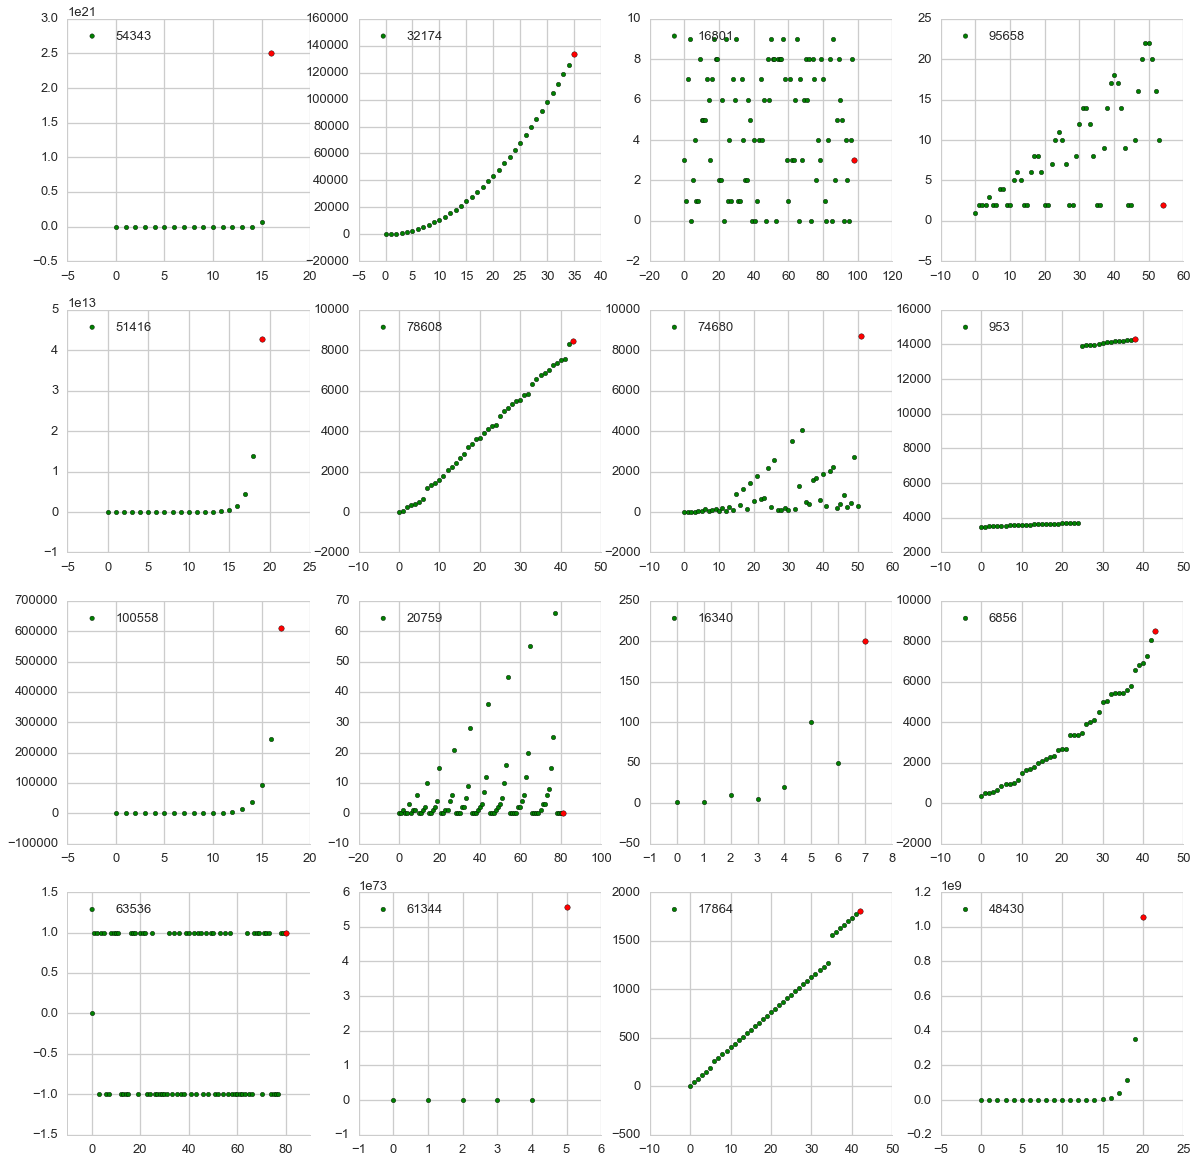

In [136]:
df.ints_len.max()
nrows, ncols = 4, 4
ar = np.random.randint(low=0, high=len(df.index), size=nrows*ncols)
print('Indices:', ar)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))
sns.set(style='whitegrid', context='talk')
#for i in range(nrows * ncols):
cnt = 0
for i in ar:    
    row = df.ix[i]
    x = np.arange(row.ints_len)
    y = row.ints_data
    res = row.res
    plt.subplot(nrows, ncols, cnt + 1)
    plt.scatter(x[:-1], y, c='g', label=str(i))
    plt.scatter(x[-1], res, c='r', s=30)
    plt.legend(loc='upper left')
    cnt += 1
sns.despine()

In [137]:
df1 = df.iloc[108357]
df_train = pd.DataFrame()
df_train['x'] = np.arange(df1.ints_len)
df_train['x2'] = df_train.x ** 2
df_train['x3'] = df_train.x ** 3
df_train['x4'] = df_train.x ** 4
df_train['x5'] = df_train.x ** 5
df_train['sqrt'] = df_train.x ** .5
df_train['exp'] = np.exp(df_train.x).astype(float)
df_train['x0'] = 1
df_train['odd'] = df_train.x % 2
df_train['log'] = np.log(df_train.x).astype(float)
df_train['sin'] = np.sin(df_train.x)
df_train['cos'] = np.cos(df_train.x)
df_train['res'] = list(map(int, df1.ints_list))
df_train['prev'] = df_train.res.shift(1)
df_train['diff'] = df_train.res - df_train.prev
#df_train['def'] = default_value
df_train = df_train[['x0', 'x', 'x2', 'x3', 'x4', 'x5', 'sqrt', 'odd', 'exp', 'log', 'sin', 'cos', 'prev', 'res']]
#df_train

In [207]:
df2 = df.head(10)
#df2['freqs'] = df2.ints_data.apply(lambda x: pd.Series(x).value_counts().to_string())
#df2
for i in range(10):
    df2 = df.ix[i]    
    s = pd.Series(df2.ints_data)        
    freqs = s[s < np.iinfo(np.int64).max].value_counts()
    if len(freqs.index) > 2:
        freq, next_freq = freqs.iloc[0], freqs.iloc[1]
        default_value = freqs.idxmax() if freq / next_freq >= 2 else df2.ints_data[-1]
    else:
        default_value = df2.ints_data[-1]
    print(df2.ints_data)
    print(i, default_value)

[1, 3, 13, 87, 1053, 28576, 2141733, 508147108, 402135275365, 1073376057490373, 9700385489355970183, 298434346895322960005291, 31479360095907908092817694945]
0 31479360095907908092817694945
[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9, 1, 47, 112, 104, 48, 11, 1, 95, 272, 320, 200, 70, 13, 1, 191, 640, 912, 720, 340, 96, 15, 1, 383, 1472, 2464, 2352, 1400, 532, 126, 17, 1, 767, 3328, 6400, 7168, 5152, 2464, 784, 160, 19, 1, 1535]
1 1
[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 128, 160, 256, 320, 512, 640, 1024, 1280, 2048, 2560, 4096, 5120, 8192, 10240, 16384, 20480, 32768, 40960, 65536, 81920, 131072, 163840, 262144, 327680, 524288, 655360, 1048576, 1310720]
2 1310720
[1, 8, 25, 83, 274, 2275, 132224, 1060067, 3312425, 10997342, 36304451, 301432950, 17519415551, 140456757358, 438889687625, 1457125820233, 4810267148324, 39939263006825, 2321287521544174]
3 2321287521544174
[1, 111, 12211, 1343211, 147753211, 16252853211, 1787813853211, 196659523853211, 21632547623853211, 237958023862

In [8]:
ints_ser = pd.Series(list(map(int, df1.ints_list)))
print('mean:', np.mean(ints_ser))
print('last:', df1.ints_list[-1])
try:
    freqs = ints_ser.value_counts() 
    if len(freqs.index) > 2:
        freq, next_freq = freqs.iloc[0], freqs.iloc[1]
        default_value = freqs.idxmax() if freq / next_freq >= 2 else df1.ints_list[-2]
        print('most frequent value: %d (freq = %d)' % (freqs.idxmax(), freqs.iloc[0]))
        print(freqs.head().to_string())
    else:
        default_value = df1.ints_list[-2]
except OverflowError:
    print('overflow')
    default_value = df1.ints_list[-2]

print('default value = ', default_value)

mean: 12.515151515151516
last: 34
most frequent value: 1 (freq = 10)
1     10
4      6
0      5
3      4
10     4
default value =  45


In [81]:
# Check recursion

def get_matrix(seq, order):
    A = []
    for i in range(order + 1):
        s = [1] + seq[i:i+order]
        A = s if i == 0 else np.vstack([A, s]) 
    b = seq[order:2*order+1]
    return A, b

def check_recursion(seq):
    p = len(seq) - 1
    n = int(p/2 -1)
    try:
        A, b = get_matrix(seq, n)
        if  np.linalg.matrix_rank(A) - 1 < n:
            n = np.linalg.matrix_rank(A) - 1
            A, b = get_matrix(seq, n)
        w = np.linalg.solve(A, b)    
        # check
        feat_check_A = [1] + seq[n+1:2*n+1]
        feat_check_b = seq[2*n+1]
        if np.dot(feat_check_A, w) == feat_check_b:        
            feat_pred_A = [1] + seq[p-n+1:]
            predict = np.dot(feat_pred_A, w)
            return int(predict)
        else: return np.nan        
    except:
        return np.nan

In [10]:
print('Recursion:', check_recursion(list(map(int, df1.ints_data))))

Recursion: None


In [11]:
cols = [col for col in df_train.columns if col != 'res']
df_train.replace(np.inf, np.nan, inplace=True)
df_train.replace(-np.inf, np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train = df_train.reset_index()
print(cols)

['x0', 'x', 'x2', 'x3', 'x4', 'x5', 'sqrt', 'odd', 'exp', 'log', 'sin', 'cos', 'prev']


In [12]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
X_train = df_train[:-1][cols]
y_train = df_train[:-1].res
X_test = df_train[cols]
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
df_train['predict'] = pred

In [13]:
print(X_train.tail(10).to_string(), '\n')
print(X_test.tail(10).to_string(), '\n')
print(y_train.tail(10).to_string(), '\n')
print(pred[-1])

    x0   x    x2      x3        x4          x5      sqrt  odd           exp       log       sin       cos prev
54   1  55  3025  166375   9150625   503284375  7.416198    1  7.694785e+23  4.007333 -0.999755  0.022127   31
55   1  56  3136  175616   9834496   550731776  7.483315    0  2.091659e+24  4.025352 -0.521551  0.853220   25
56   1  57  3249  185193  10556001   601692057  7.549834    1  5.685720e+24  4.043051  0.436165  0.899867   33
57   1  58  3364  195112  11316496   656356768  7.615773    0  1.545539e+25  4.060443  0.992873  0.119180   24
58   1  59  3481  205379  12117361   714924299  7.681146    1  4.201210e+25  4.077537  0.636738 -0.771080   34
59   1  60  3600  216000  12960000   777600000  7.745967    0  1.142007e+26  4.094345 -0.304811 -0.952413   28
60   1  61  3721  226981  13845841   844596301  7.810250    1  3.104298e+26  4.110874 -0.966118 -0.258102   41
61   1  62  3844  238328  14776336   916132832  7.874008    0  8.438357e+26  4.127134 -0.739181  0.673507   31
6

In [14]:
from sklearn import cross_validation
import warnings

alphas = [10 ** x for x in range(-5, 5)]
with warnings.catch_warnings():
    warnings.filterwarnings('error')
    try:
        lr_rigdeCV = linear_model.RidgeCV(alphas=alphas)
        lr_rigdeCV.fit(X_train, y_train)
        best_alpha = lr_rigdeCV.alpha_        
    except: best_alpha = 0.1
    
print('Alpha =', best_alpha)    
lr_ridge = linear_model.Ridge(alpha=best_alpha)
lr_ridge.fit(X_train, y_train)
pred_ridge = lr_ridge.predict(X_test)
df_train['predict_ridge'] = pred_ridge

kf = cross_validation.KFold(len(X_train.index), n_folds=5, shuffle=True)
scores = cross_validation.cross_val_score(lr_ridge, X_train, y_train, cv=kf)
print('Cross validation score =', np.mean(scores))

Alpha = 0.0001
Cross validation score = 0.519314578278


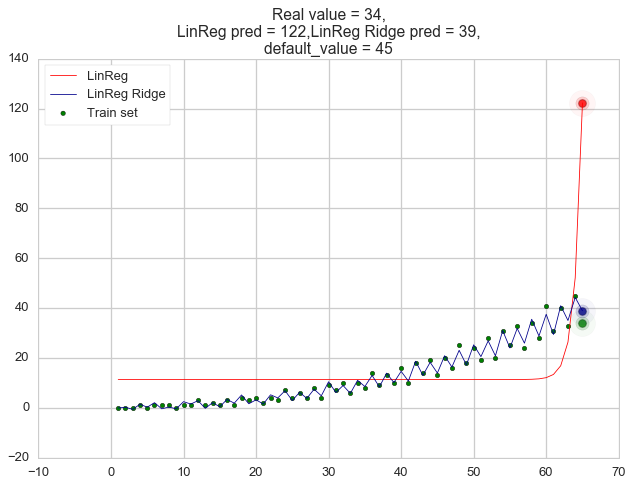

In [15]:
import seaborn as sns
sns.set(style='whitegrid', context='talk')
plt.scatter(df_train[:-1].x, df_train[:-1].res, s=20, c='g', label='Train set')

for j in range(5):    
    plt.scatter(df_train[-1:].x, df_train[-1:].res, s=50+5**j, c='green', alpha=0.52-0.12*j, label='_')
    plt.scatter(df_train[-1:].x, df_train[-1:].predict,  s=50+5**j, c='red', alpha=0.52-0.12*j, label='_')
    plt.scatter(df_train[-1:].x, df_train[-1:].predict_ridge,  s=50+5**j, c='darkblue', alpha=0.52-0.12*j, label='_')
    
plt.plot(df_train.x, df_train.predict, '-', c='r', lw=0.8, ms=5, label='LinReg')
plt.plot(df_train.x, df_train.predict_ridge, '-', c='darkblue', lw=0.8, ms=5, label='LinReg Ridge')
plt.legend(loc='upper left', frameon=True)
#sns.despine()
res = df_train[-1:].res
lr_p = int(np.round(float(df_train[-1:].predict.values[0])))
lrr_p = int(np.round(float(df_train[-1:].predict_ridge.values[0])))
plt.title('Real value = %s,\nLinReg pred = %s,LinReg Ridge pred = %s,\ndefault_value = %d'
          % (str(df_train[-1:].res.values[0]), str(lr_p), str(lrr_p), int(default_value)))

In [518]:
st = time.time()
#df['recursion'] = df.ints_data.apply(lambda x: check_recursion(list(map(int, x))))
#print('Recursions checked. Time elapsed: %.2f min' % ((time.time() - st) / 60))
#df[['Id', 'recursion']].to_csv('train_recursion_result.csv', encoding='utf-8-sig')
df['recursion'] = df['Id'].map(pd.read_csv('train_recursion_result.csv', encoding='utf-8-sig').set_index('Id').recursion)
df.head()

Recursions checked. Time elapsed: 2.83 min


,Id,ints_list,ints_len,ints_data,res,prev,recursion,preds
0,3,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",11474377948948020660089085281068730,31479360095907908092817694945,NaN,3.3205e+33
1,7,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",7424,1535,NaN,1
2,8,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",2097152,1310720,NaN,1310720
3,11,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",18610239435360217,2321287521544174,NaN,2321287521544174
4,13,"[1, 111, 12211, 1343211, 147753211, 1625285321...",12,"[1, 111, 12211, 1343211, 147753211, 1625285321...",28792920887348623853211,261753826248623853211,2.879292e+22,2.87929e+22


In [ ]:
# check some recursions
import time
st = time.time()
def get_diffs(x):
    return [x[i+1] - x[i] for i in range(len(x) - 1)] if len(x) > 1 else x    

df['ints_data'] = df.ints_data.apply(lambda x: list(map(int, x)))
df['diffs'] = df.ints_data.apply(get_diffs)
df['plus1'] = df.ints_data.apply(lambda x: [i+1 for i in x])
df['minus1'] = df.ints_data.apply(lambda x: [i-1 for i in x])
print('time: %.2f min', ((time.time() - st) / 60))

In [ ]:
st = time.time()
df['recursion'] = df['Id'].map(pd.read_csv('train_recursion_result.csv', encoding='utf-8-sig').set_index('Id').recursion)
df['rec_diffs'] = df.apply(lambda row: check_recursion(row.diffs) + row.prev, axis=1)
df['rec_plus1'] = df.plus1.apply(lambda x: check_recursion(x) - 1)
df['rec_minus1'] = df.minus1.apply(lambda x: check_recursion(x) + 1)
print('time: %.2f min', ((time.time() - st) / 60))

In [ ]:
print(df[df.recursion.notnull()].Id.count() / sample_n)
df.recursion.fillna(df.rec_diffs, inplace=True)
df.recursion.fillna(df.rec_plus1, inplace=True)
df.recursion.fillna(df.rec_minus1, inplace=True)
print(df[df.recursion.notnull()].Id.count() / sample_n)
df[['Id', 'recursion']].to_csv('train_full_recursion_result.csv', encoding='utf-8-sig')

In [533]:
from sklearn import linear_model 
from sklearn import cross_validation
import time
preds = []
longest = df.ints_len.max() + 1
#cnt = 200
#cnt = 10000
cnt = len(df.index)

df_train = pd.DataFrame()
df_train['x'] = np.arange(longest)
df_train['x0'] = 1
df_train['x2'] = df_train.x ** 2
df_train['x3'] = df_train.x ** 3
df_train['x4'] = df_train.x ** 4
df_train['sqrt'] = df_train.x ** .5
df_train['exp'] = np.exp(df_train.x)
df_train['odd'] = df_train.x % 2
df_train['log'] = np.log(df_train.x)
df_train['sin'] = np.sin(df_train.x)
df_train['cos'] = np.cos(df_train.x)

alphas = [10 ** x for x in range(-4, 4)]
st = time.time()
for i in range(cnt):
    if (i % 1000 == 0) & (i != 0):
        print('Sequences: %d of %d, time elapsed: %.2f min, total estimated time: %.2f min' 
              % (i, cnt, (time.time() - st) / 60, (time.time() - st) * cnt / (60 * i)))        
    #print(i)
    df1 = df.ix[i]    
    df_curr = df_train[:df1.ints_len].copy(deep=True)    
    #print(df1.ints_len, len(df_curr.index))
    df_curr['res'] = df1.ints_list
    df_curr['prev'] = df_curr.res.shift(1)
    ints_ser = pd.Series(list(map(int, df1.ints_list)))
    def_func = df1.ints_data[-1] if len(df1.ints_data) > 0 else 1
    #def_func = np.mean(ints_ser)
    try:
        freqs = ints_ser[ints_ser < np.iinfo(np.int64).max].value_counts() 
        if len(freqs.index) > 2:
            freq, next_freq = freqs.iloc[0], freqs.iloc[1]
            default_value = freqs.idxmax() if freq / next_freq >= 2 else def_func
        else:
            default_value = def_func
    except OverflowError:
        default_value = def_func
    
    df_curr['def'] = default_value
    df_curr = df_curr[['x0', 'x', 'x2', 'x3', 'x4', 'sqrt', 'odd', 'exp', 'log', 'sin', 'cos', 'prev', 'def', 'res']]

    cols = [col for col in df_curr.columns if col != 'res']    
    df_curr = df_curr[1:].reset_index()
    
    if not df_curr[:-1].empty:
        X_train = df_curr[:-1][cols]
        y_train = df_curr[:-1].res        
        X_test = df_curr[cols]        
        
        lr = linear_model.LinearRegression()        
        lr.fit(X_train, y_train)        
        pred = lr.predict(X_test)
        df_curr['predict'] = pred        
        #preds.append(df_curr[-1:].predict)
        
        with warnings.catch_warnings():
            warnings.simplefilter("error")            
            try:
                lr_rigdeCV = linear_model.RidgeCV(alphas=alphas)
                lr_rigdeCV.fit(X_train, y_train)
                best_alpha = lr_rigdeCV.alpha_
            except: best_alpha = 0.1
            
            try:
                lr_ridge = linear_model.Ridge(alpha=best_alpha)
                lr_ridge.fit(X_train, y_train)
                pred_ridge = lr_ridge.predict(X_test)
            except: pred_ridge = pred
                
            if len(X_train.index) > 5:
                try:
                    kf = cross_validation.KFold(len(X_train.index), n_folds=5, shuffle=True)
                    scores = cross_validation.cross_val_score(lr_ridge, X_train, y_train, cv=kf)
                    col_to_result = 'def' if np.mean(scores) < 0.999 else 'predict_ridge'                    
                    #if np.mean(scores) >= 0.999:
                    #    if np.round(pred_ridge[-1]) == int(df1.ints_list[-1]): 
                    #        print('SUCCESS!!!')
                    #        print('CV score =', np.mean(scores))
                    #        print('Predict', int(np.round(pred_ridge[-1])), ', real', df1.ints_list[-1])
                except: col_to_result = 'predict_ridge'
            else: col_to_result = 'predict_ridge'

        df_curr['predict_ridge'] = pred_ridge
        preds.append(df_curr[-1:][col_to_result].values[0])
        
    else:
        preds.append(default_value)
    
print(len(df.index), len(preds))
print('Time %.2f sec' % (time.time() - st))
print('Estimated time for full test data: %.2f min' % ((time.time() - st) * int(len(df.index)) / (60 * int(len(preds)))))
print(preds[:20])

Sequences: 1000 of 113845, time elapsed: 0.53 min, total estimated time: 60.76 min
Sequences: 2000 of 113845, time elapsed: 1.04 min, total estimated time: 59.14 min
Sequences: 3000 of 113845, time elapsed: 1.64 min, total estimated time: 62.05 min
Sequences: 4000 of 113845, time elapsed: 2.23 min, total estimated time: 63.51 min
Sequences: 5000 of 113845, time elapsed: 2.75 min, total estimated time: 62.55 min
Sequences: 6000 of 113845, time elapsed: 3.36 min, total estimated time: 63.73 min
Sequences: 7000 of 113845, time elapsed: 3.88 min, total estimated time: 63.13 min
Sequences: 8000 of 113845, time elapsed: 4.41 min, total estimated time: 62.74 min
Sequences: 9000 of 113845, time elapsed: 4.97 min, total estimated time: 62.81 min
Sequences: 10000 of 113845, time elapsed: 5.59 min, total estimated time: 63.69 min
Sequences: 11000 of 113845, time elapsed: 6.16 min, total estimated time: 63.80 min
Sequences: 12000 of 113845, time elapsed: 6.78 min, total estimated time: 64.28 min
S

In [539]:
print(len(preds))
if 'preds' in df.columns:
    df.drop('preds', axis=1, inplace=True)

df = df.join(pd.Series(preds, name='preds').to_frame())
df[['Id', 'ints_data', 'recursion', 'preds']].head()

113845


,Id,ints_data,recursion,preds
0,3,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",NaN,3.3205e+33
1,7,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",NaN,1
2,8,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",NaN,1310720
3,11,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",NaN,2321287521544174
4,13,"[1, 111, 12211, 1343211, 147753211, 1625285321...",2.879292e+22,2.87929e+22


In [541]:
df['Last'] = df.recursion
df.Last.fillna(df.preds, inplace=True)
df.Last.fillna(df.prev, inplace=True)
df.Last.fillna(1, inplace=True)
#df[df.Last.isnull()]
df['Last'] = df['Last'].apply(lambda x: int(np.round(float(x))))
df[['Id', 'ints_data', 'res', 'recursion', 'preds']].head(10)

,Id,ints_data,res,recursion,preds
0,3,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",11474377948948020660089085281068730,NaN,3.3205e+33
1,7,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",7424,NaN,1
2,8,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",2097152,NaN,1310720
3,11,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",18610239435360217,NaN,2321287521544174
4,13,"[1, 111, 12211, 1343211, 147753211, 1625285321...",28792920887348623853211,2.879292e+22,2.87929e+22
5,15,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, ...",5,NaN,1
6,16,"[840, 1320, 1680, 2520, 3192, 3432, 4920, 5208...",63240,NaN,61320
7,18,"[1, 2, 7, 27, 113, 483, 2138, 9681, 44374, 205...",83994842745043322,NaN,17161306005034007
8,20,"[4, 6, 8, 9, 26]",1752,NaN,93.1162
9,21,"[1, 2, 1, 3, 4, 2, 4, 8, 8, 3, 5, 13, 19, 15, ...",2619,NaN,8


In [542]:
# check train
df['res_str'] = df.res.apply(str)
df['last_str'] = df.Last.apply(str)
df[df.res_str == df.last_str].Id.count() / df.Id.count()

0.13997979709253811

In [ ]:
#df[['Id', 'Last']].to_csv('submission.csv', sep=',', index=False)